In [1]:
%matplotlib inline
import numpy as np
import os
os.chdir('../../util/')
from bern_beta import bern_beta

/opt/anaconda3/lib/python3.8/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


**Exercise 12.1. [Purpose: To make sure you understand the Bayes' factors regarding a single coin in Figure 12.3 and Equation 12.4, including the Savage-Dickey method.]** Find the file BernBeta.R in the programs that accompany this book. Open RStudio with the folder of that file as R's working directory. Source the file so that R knows about the function `BernBeta`:

```
source("BernBeta.R")
```

Now, suppose we have a coin that is flipped 24 times and shows 7 heads. Enter the data into R, like this:

```
z=7 ; N=24
```

**(A)** According to the spike null hypothesis, for which the only credible value of $\theta$ is 0.5, what is the probability of the data? *Hint:* It is $\theta^z (1-\theta)^{(N-z)}$. Compute the value.

In [2]:
z = 7
N = 24
theta = 0.5

p = theta ** z * (1 - theta)**(N-z)

print(p)

5.960464477539063e-08


**(B)** Verify the result of the previous part by approximating a spike prior with a narrow beta distribution. Use the `BernBeta` function with a $beta(\theta|2000, 2000)$ prior, like this:

```
a=2000 ; b=2000
openGraph(widht=5,height=7)
BernBeta( c(a,b) , c(rep(0,N-z), rep(1,z)) , ROPE=c(0.48,0.52) ,
          plotType="Bars" , showCentTend="Mode" , showHDI=TRUE , showpD = TRUE )
```

Include the resulting graph in your report. What is the value of $p(D)$ for this prior? Is it very close to the value computed from the exact spike prior in the previous part of the exercise? (It should be.) Explain why they are not exactly equal. 

p(D) = 6.016980469645256e-08


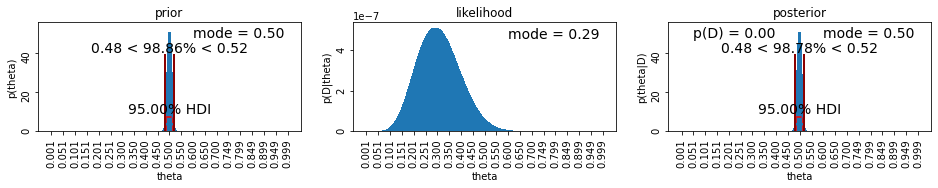

In [3]:
_ = bern_beta([2000, 2000], 
              np.hstack((np.repeat(0, N - z), np.repeat(1, z))),
              rope = [0.48, 0.52],
              plot_type = 'bars',
              show_cent_tend = 'mode', 
              show_hdi = True,
              show_pd = True)

It is very similar, but not exactly the same because within `bern_beta` we take into account our prior 